# Neural & Behavioral Modeling - Week 4 (Exercises)
by Hsuan Fu Lin (b03201038@ntu.edu.tw)

In [ ]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from math import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Replicate exisiting findings/models 
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://www.wetalk.tw/thread-36278-1-1.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

4.
Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations. Psychological Science, 25(4), 982-990.

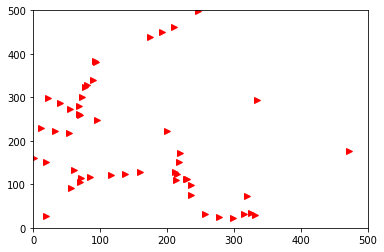

In [ ]:
# Model parameters:
Nboids=50 
world=[0,500,0,500] # world boundaries

speed=10
speed_change_vactor = .15 
updraft_distance = 20
too_close=10
max_turn=pi/45

vision_distance = 50
vision_cone = pi*2/3
obstruction_cone = pi/4


repulsion_dis=10   # repulsion distance
alignment_dis=80   # alignment distance
attraction_dis=100 # attraction distance

# Supporting functions:
class Boid:
    
    def __init__(self,world):
        world_size=max(world)
        self.position=world_size*random.rand(2) 
        self.speed = speed
        temp_dir=random.rand(2)                    #unit vector
        self.direction=temp_dir/linalg.norm(temp_dir)
        
        
    def move(self,world,boids,distance,me):
        vision_group=[j for j in range(Nboids) if distance[j]<vision_distance and j!=me and dot((boids[j].position-self.position)/linalg.norm(boids[j].position-self.position),self.direction)>cos(vision_cone/2)]
        
        if len(vision_group)>0:
            #for j in vision_group:
            #    print(len(vision_group),distance[j],j)
            #    print(self.position,me)
            closest_distance,closest_neighbor= min((distance[j],j) for j in vision_group if distance[j]>0 )
            # if i am too close to the nearest bird slow down
            if closest_distance < too_close:
                self.speed = self.speed*(1-speed_change_vactor)
            # if I am too far away from the nearest bird I can see, then try to get near them
            elif closest_distance > updraft_distance:
                self.direction = (boids[closest_neighbor].position-self.position)/linalg.norm(boids[closest_neighbor].position-self.position)
                self.speed = self.speed*(1+speed_change_vactor)
            # if my view is obstructed, move sideways randomly
            else:
                obstruction=0
                for j in vision_group:
                    if dot((boids[j].position-self.position),self.direction)/linalg.norm(boids[j].position-self.position) > cos(obstruction_cone) :  
                        random_side = max_turn*2*random.rand() - max_turn
                        A = self.direction[0]
                        B = self.direction[1]
                        self.direction = [cos(random_side)*A-sin(random_side)*B,sin(random_side)*A+cos(random_side)*B]
                        obstruction=1
                if obstruction==1:
                    self.speed = self.speed*(1+speed_change_vactor)
                else:
                    self.direction = (boids[closest_neighbor].position-self.position)/linalg.norm(boids[closest_neighbor].position-self.position)
                    
                
                    
            
        # For all cases (including the case of no neighbors at all):
        self.direction/=linalg.norm(self.direction) # make it a unit vector
        self.position=self.position+self.direction*speed
        self.position=mod(self.position,max(world)) # cyclic boundary

def plot_world(world,boids):
    clf() # clear previous figure
    for b in boids:
        plot(b.position[0],b.position[1],'r>')
    axis(world)
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
boids=[Boid(world) for i in range(Nboids)] # assign each boid to a position

for t in range(500):
    
    # Calculate some pairwise distances in vision before anyone moves:
    distance=zeros([Nboids,Nboids])
    for i in range(Nboids):
        for j in range(i+1,Nboids):
            distance[i,j]=linalg.norm(boids[i].position-boids[j].position)
            distance[j,i]=distance[i,j]

        
        
    
    # Move according to the three rules:       
    for i in range(Nboids):
        boids[i].move(world,boids,distance[i,:],i)
        
    plot_world(world,boids)